# Compare chirp and LED sync results

**New notes**

This notebook is a revision of `20210204_09_compare-sync-time-chirp-LED.ipynb`.


**Notes from the previous notebook**

This notebook is a revision of `20210118_sync-click-track-all-trial-LED.ipynb`.

Here we incorporate the new columns in the main dataframe built from 01-08 notebooks.

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
analysis_path = Path('../data_processed/')
main_info_file = analysis_path / 'all_info_csv/main_info_append_08.csv'
LED_path = analysis_path / 'click_sync_LED/sync_csv/'
chirp_path = analysis_path / 'click_sync/sync_csv/'

In [3]:
df_main = pd.read_csv(main_info_file, index_col=0)

In [4]:
df_main

,DATE,SESSION,PERSONNEL,TRIAL,LEFT,RIGHT,ANGLE,SPHEROID,ASPECT_RATIO,SEQUENCE,...,xypressure_need_one_video,xypressure_csv_assembled,dtag_tap_sync_exist,xypressure_file_exist,CHIRP_trial_has_chirp,CHIRP_trial_has_clutter_object,CHIRP_trial_clicks_synced,LED_trial_has_LED,LED_trial_has_clutter_object,LED_trial_clicks_synced
0,20190625,1,"WJ, ML",0,T,X,1,X,0.0,1,...,False,False,True,False,True,False,False,False,False,False
1,20190625,1,"WJ, ML",0,T,X,1,X,0.0,1,...,False,False,True,False,True,False,False,False,False,False
2,20190625,1,"WJ, ML",1,T,C,1,L,2.9,1,...,True,True,True,True,True,True,True,False,False,False
3,20190625,1,"WJ, ML",2,C,T,1,L,2.9,1,...,True,True,True,True,True,True,True,False,False,False
4,20190625,1,"WJ, ML",3,T,C,1,L,2.9,1,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,20190704,3,ML,8,T,C,1,M,1.3,24,...,True,True,True,True,True,True,True,True,True,True
243,20190704,3,ML,9,C,T,3,M,1.3,24,...,True,True,True,True,True,True,True,True,True,True
244,20190704,3,ML,10,T,C,3,M,1.3,24,...,True,True,True,True,True,True,True,True,True,True
245,20190704,3,ML,11,T,C,3,M,1.3,24,...,True,True,True,True,True,True,True,True,True,True


## Find the trials sync'ed by both chirp and LED or at least one of them

In [5]:
df_main['trials_sync_both_chirp_and_LED'] = (
    df_main['CHIRP_trial_clicks_synced'] & df_main['LED_trial_clicks_synced']
)

In [6]:
df_main['trials_sync_at_least_chirp_or_LED'] = (
    df_main['CHIRP_trial_clicks_synced'] | df_main['LED_trial_clicks_synced']
)

In [7]:
df_main

,DATE,SESSION,PERSONNEL,TRIAL,LEFT,RIGHT,ANGLE,SPHEROID,ASPECT_RATIO,SEQUENCE,...,dtag_tap_sync_exist,xypressure_file_exist,CHIRP_trial_has_chirp,CHIRP_trial_has_clutter_object,CHIRP_trial_clicks_synced,LED_trial_has_LED,LED_trial_has_clutter_object,LED_trial_clicks_synced,trials_sync_both_chirp_and_LED,trials_sync_at_least_chirp_or_LED
0,20190625,1,"WJ, ML",0,T,X,1,X,0.0,1,...,True,False,True,False,False,False,False,False,False,False
1,20190625,1,"WJ, ML",0,T,X,1,X,0.0,1,...,True,False,True,False,False,False,False,False,False,False
2,20190625,1,"WJ, ML",1,T,C,1,L,2.9,1,...,True,True,True,True,True,False,False,False,False,True
3,20190625,1,"WJ, ML",2,C,T,1,L,2.9,1,...,True,True,True,True,True,False,False,False,False,True
4,20190625,1,"WJ, ML",3,T,C,1,L,2.9,1,...,True,True,True,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,20190704,3,ML,8,T,C,1,M,1.3,24,...,True,True,True,True,True,True,True,True,True,True
243,20190704,3,ML,9,C,T,3,M,1.3,24,...,True,True,True,True,True,True,True,True,True,True
244,20190704,3,ML,10,T,C,3,M,1.3,24,...,True,True,True,True,True,True,True,True,True,True
245,20190704,3,ML,11,T,C,3,M,1.3,24,...,True,True,True,True,True,True,True,True,True,True


Save the new columns:

In [8]:
df_main.to_csv(analysis_path / 'all_info_csv/main_info_append_09.csv')

## Get sync time difference

Number of trials that are synced by both chirp and LED:

In [9]:
len(df_main.loc[df_main['trials_sync_both_chirp_and_LED']==True, :])

61

In [10]:
df_main.loc[df_main['trials_sync_both_chirp_and_LED']==True, :].index

Int64Index([153, 154, 155, 157, 158, 159, 161, 173, 175, 176, 177, 178, 179,
            180, 181, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
            200, 201, 202, 203, 204, 205, 207, 209, 210, 211, 212, 213, 224,
            225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237,
            238, 239, 240, 241, 242, 243, 244, 245, 246],
           dtype='int64')

In [11]:
fname_all = []
sync_time_diff = []
for tindx in df_main.loc[df_main['trials_sync_both_chirp_and_LED']==True, :].index:
    s = df_main.loc[tindx, :]
    fname = '%s/%s_s%s_t%s_hydro_ch0.csv' % ('DTAG', s['DATE'], s['SESSION'], s['TRIAL'])
    df_chirp = pd.read_csv(str(chirp_path.joinpath(fname)), index_col=0)
    df_LED = pd.read_csv(str(LED_path.joinpath(fname)), index_col=0)
    fname_all.append(fname)
    sync_time_diff.append(df_chirp.loc[0, 'time_corrected'] - df_LED.loc[0, 'time_corrected'])
sync_time_diff = np.array(sync_time_diff)

In [12]:
df_sync = pd.DataFrame(sync_time_diff, columns=['sync_time_diff'])
df_sync['filename'] = fname_all

In [13]:
df_sync

,sync_time_diff,filename
0,-0.015695,DTAG/20190702_s1_t2_hydro_ch0.csv
1,0.009088,DTAG/20190702_s1_t3_hydro_ch0.csv
2,-0.022250,DTAG/20190702_s1_t4_hydro_ch0.csv
3,0.001644,DTAG/20190702_s1_t6_hydro_ch0.csv
4,-0.020047,DTAG/20190702_s1_t7_hydro_ch0.csv
...,...,...
56,-0.006198,DTAG/20190704_s3_t8_hydro_ch0.csv
57,0.002530,DTAG/20190704_s3_t9_hydro_ch0.csv
58,-0.009443,DTAG/20190704_s3_t10_hydro_ch0.csv
59,-0.027384,DTAG/20190704_s3_t11_hydro_ch0.csv


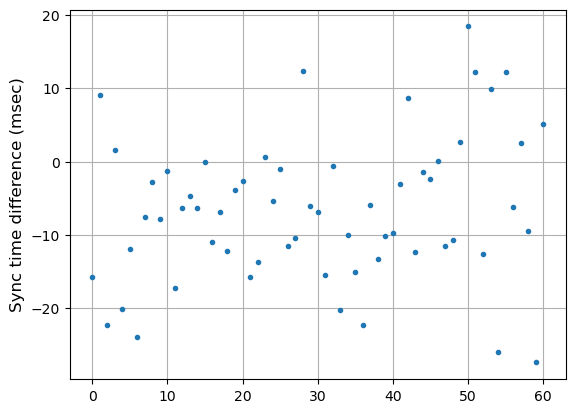

In [14]:
(df_sync['sync_time_diff']*1e3).plot(marker='.', linestyle='none')
plt.grid()
plt.ylabel('Sync time difference (msec)', fontsize=12)
plt.show()

The chirp sync results are mostly slightly _later_ than the LED results. But the difference is on the order 10-12 msec, which is within the 1 frame resolution of the video. So it seems that we're actually doing a reasonably good job using the chirp (in combination with the Dtag tapping) to sync all the signals.